In [71]:
import pandas as pd
import numpy as np
import datetime, time

from sklearn.cluster import DBSCAN,KMeans
from sklearn.metrics import silhouette_score

from kneed import KneeLocator

import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv('data/ens_2014.csv')


In [ ]:
day_order = ['Monday', 'Sunday']


In [ ]:

results = []

depart = time.time()  
for day in day_order:
    print(f'jour {day} : {datetime.datetime.now().strftime("%H:%M:%S")}')
    duree_jour = time.time()
    df_day=df[df['day_of_week']==day]
    for i in range(12):

        coords = df_day[df_day['hour']==i][['Lat', 'Lon']].values
        print(f'jour {day} heure {i}h, {coords.shape[0]} lignes')
        inertias = []
        silhouette_scores = []

        #Je limite le nombre de cluster de 3 à 9 pour éviter trop de changement 
        K = range(2, 10)

        for k in K:
            kmeans = KMeans(n_clusters=k, random_state=42, n_init = 'auto')
            kmeans.fit(coords)
            inertias.append(kmeans.inertia_)
            score = silhouette_score(coords, kmeans.labels_)
            silhouette_scores.append(score)

        kneedle = KneeLocator(K, inertias, curve="convex", direction="decreasing")
        coude = kneedle.knee

        #La silhouette a trop de période à 2 cluster qui faussent les résutats
        valid_idx = [i for i, k in enumerate(K) if k != 2] 
        valid_scores = np.array(silhouette_scores)[valid_idx]
        valid_K = np.array(list(K))[valid_idx]

        if np.all(np.isnan(valid_scores)):
            best_k_silhouette = np.nan
            best_silhouette = np.nan
        else:
            best_k_silhouette = valid_K[np.nanargmax(valid_scores)]
            best_silhouette = np.nanmax(valid_scores)
        idx_coude = list(K).index(int(coude))
        silhouette_coude = silhouette_scores[idx_coude]
                
        dbscan = DBSCAN(eps=0.005, min_samples=200).fit(coords)
        labels = dbscan.labels_
        n_clusters_db = len(set(labels)) - (1 if -1 in labels else 0)

        # Calcul du score silhouette si plus de 2 clusters. 
        if n_clusters_db > 2:
            try:
                silhouette_db = silhouette_score(coords, labels)
            except:
                silhouette_db = np.nan
        else:
            silhouette_db = np.nan
            
            
        results.append({
            'jour':day,
            'heure': i,
            'Coude_cluster': coude,
            'Coude_silhouette': silhouette_coude,
            'Silhouette_cluster': best_k_silhouette,
            'Meilleur_silhouette': best_silhouette,
            'DBSCAN_0.005_cluster': n_clusters_db,
            'DBSCAN_0.005_silhouette': silhouette_db       
        })
    duree_journée = time.time()-duree_jour
    print(f"⏱️ Durée totale : {duree_journée:.2f} secondes\n")


df_eval = pd.DataFrame(results)
display(df_eval)
df_eval.to_csv('data/eval_test.csv')


jour Monday : 15:35:09
jour Monday heure 0h, 6377 lignes
jour Monday heure 1h, 3710 lignes
jour Monday heure 2h, 2906 lignes
jour Monday heure 3h, 6170 lignes
jour Monday heure 4h, 9542 lignes
jour Monday heure 5h, 14918 lignes
jour Monday heure 6h, 23643 lignes
jour Monday heure 7h, 31020 lignes
jour Monday heure 8h, 29087 lignes
jour Monday heure 9h, 22009 lignes
jour Monday heure 10h, 20111 lignes
jour Monday heure 11h, 20146 lignes
⏱️ Durée totale : 505.89 secondes

jour Sunday : 15:43:35
jour Sunday heure 0h, 32439 lignes
jour Sunday heure 1h, 22762 lignes
jour Sunday heure 2h, 15309 lignes
jour Sunday heure 3h, 10545 lignes
jour Sunday heure 4h, 6327 lignes
jour Sunday heure 5h, 6110 lignes
jour Sunday heure 6h, 6532 lignes
jour Sunday heure 7h, 8658 lignes
jour Sunday heure 8h, 12031 lignes
jour Sunday heure 9h, 16243 lignes
jour Sunday heure 10h, 19644 lignes
jour Sunday heure 11h, 22646 lignes
⏱️ Durée totale : 406.74 secondes



,jour,heure,Coude_cluster,Coude_silhouette,Silhouette_cluster,Meilleur_silhouette,DBSCAN_0.005_cluster,DBSCAN_0.005_silhouette
0,Monday,0,5,0.511122,5,0.511122,5,-0.130337
1,Monday,1,6,0.410568,4,0.453850,1,NaN
2,Monday,2,4,0.466753,4,0.466753,1,NaN
3,Monday,3,4,0.418739,5,0.421826,1,NaN
4,Monday,4,5,0.462720,3,0.691325,5,-0.120236
5,Monday,5,5,0.463690,7,0.481784,5,0.234285
6,Monday,6,6,0.505371,7,0.517296,4,0.101296
7,Monday,7,4,0.445197,3,0.665998,4,0.153608
8,Monday,8,6,0.484212,3,0.644704,5,0.177986
9,Monday,9,7,0.414959,3,0.580481,4,0.158809


In [84]:
df_eval = pd.read_csv("data/eval_test.csv",sep=',')
df_eval.info()
df_eval.drop(columns=['Unnamed: 0'],axis=1, inplace=True)
df_eval.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               24 non-null     int64  
 1   jour                     24 non-null     object 
 2   heure                    24 non-null     int64  
 3   Cluster_coude            24 non-null     int64  
 4   Cluster_silhouette       24 non-null     int64  
 5   Meilleur_silhouette      24 non-null     float64
 6   Cluster_DBSCAN_0.005     24 non-null     int64  
 7   Silhouette_DBSCAN_0.005  16 non-null     float64
dtypes: float64(2), int64(5), object(1)
memory usage: 1.6+ KB


jour                       0
heure                      0
Cluster_coude              0
Cluster_silhouette         0
Meilleur_silhouette        0
Cluster_DBSCAN_0.005       0
Silhouette_DBSCAN_0.005    8
dtype: int64

C:\Users\franc\AppData\Local\Temp\ipykernel_23824\3198893422.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(df_eval, x='jour', y='Cluster_silhouette', ci=None)


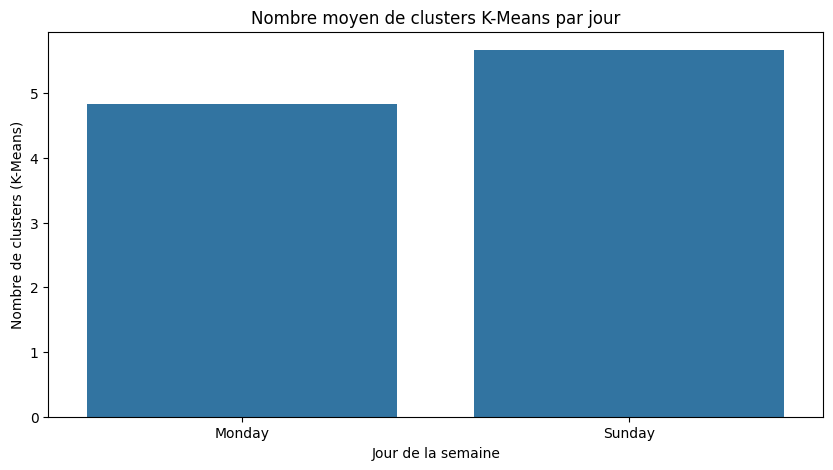

In [ ]:
plt.figure(figsize=(10,5))
sns.barplot(df_eval, x='jour', y='Cluster_silhouette', errorbar==None)
plt.title("Nombre moyen de clusters K-Means par jour")
plt.xlabel("Jour de la semaine")
plt.ylabel("Nombre de clusters (K-Means)")
plt.show()


C:\Users\franc\AppData\Local\Temp\ipykernel_23824\870621403.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df_eval, x='jour', y='Meilleur_silhouette', ci=None, color='orange')


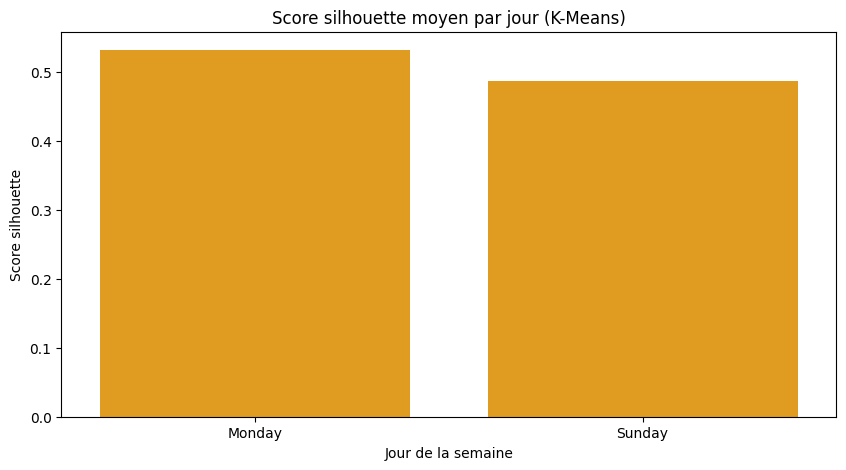

In [86]:
plt.figure(figsize=(10,5))
sns.barplot(data=df_eval, x='jour', y='Meilleur_silhouette', ci=None, color='orange')
plt.title("Score silhouette moyen par jour (K-Means)")
plt.xlabel("Jour de la semaine")
plt.ylabel("Score silhouette")
plt.show()


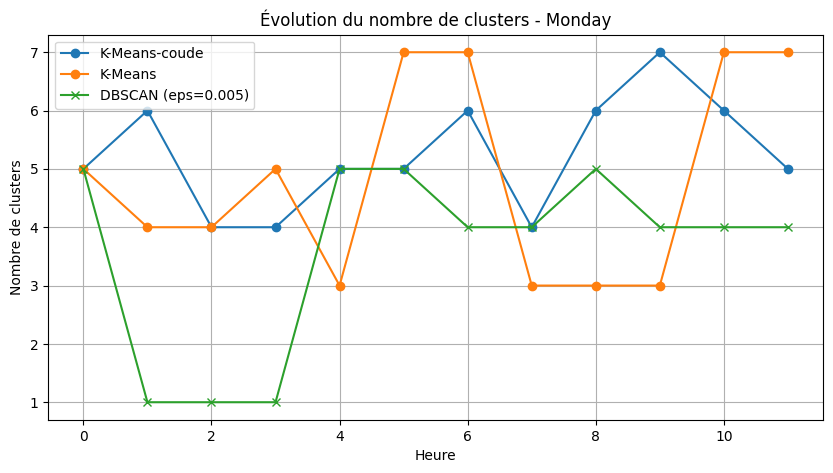

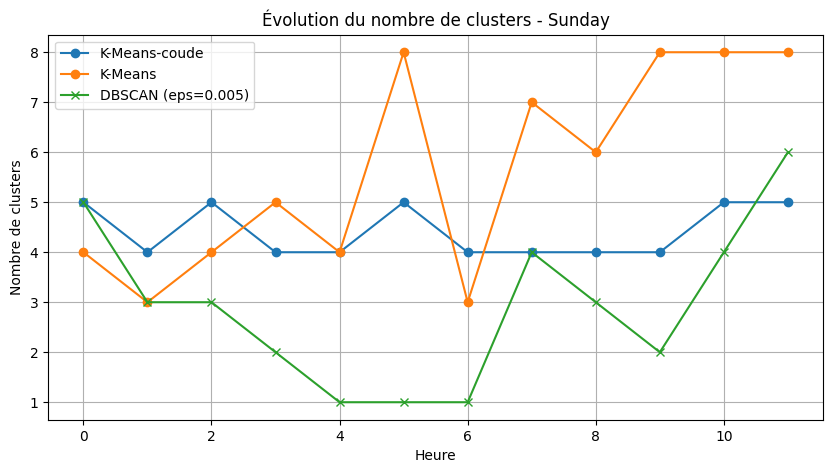

In [87]:
jours = df_eval['jour'].unique()
for j in jours:
    df_jour = df_eval[df_eval['jour'] == j]
    plt.figure(figsize=(10,5))
    plt.plot(df_jour['heure'], df_jour['Coude_cluster'], marker='o', label='K-Means-coude')
    plt.plot(df_jour['heure'], df_jour['Silhouette_cluster'], marker='o', label='Kmeans_silhouette')
    plt.plot(df_jour['heure'], df_jour['DBSCAN_0.005_cluster'], marker='x', label='DBSCAN (eps=0.005)')
    plt.title(f"Évolution du nombre de clusters - {j}")
    plt.xlabel("Heure")
    plt.ylabel("Nombre de clusters")
    plt.legend()
    plt.grid(True)
    plt.show()


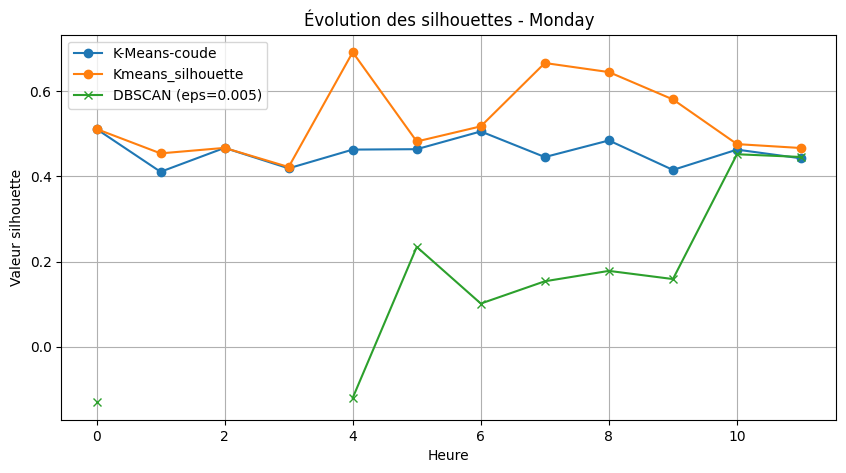

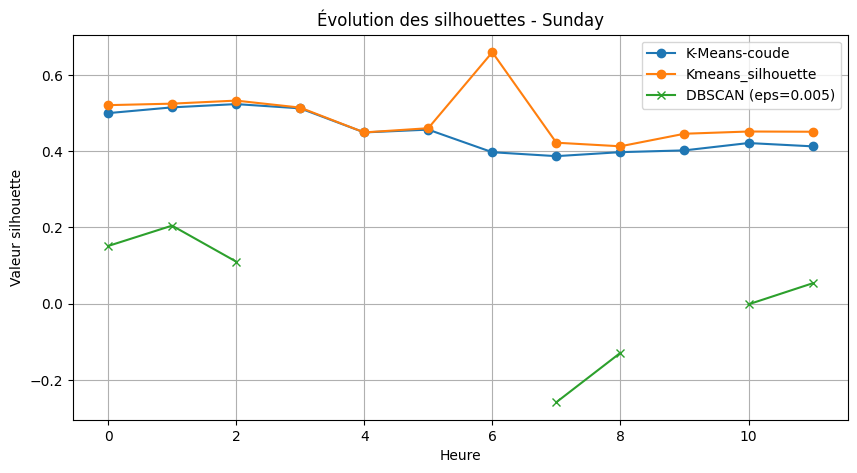

In [96]:
jours = df_eval['jour'].unique()
for j in jours:
    df_jour = df_eval[df_eval['jour'] == j]
    plt.figure(figsize=(10,5))
    plt.plot(df_jour['heure'], df_jour['Coude_silhouette'], marker='o', label='K-Means-coude')
    plt.plot(df_jour['heure'], df_jour['Meilleur_silhouette'], marker='o', label='Kmeans_silhouette')
    plt.plot(df_jour['heure'], df_jour['DBSCAN_0.005_silhouette'], marker='x', label='DBSCAN (eps=0.005)')
    plt.title(f"Évolution des silhouettes - {j}")
    plt.xlabel("Heure")
    plt.ylabel("Valeur silhouette")
    plt.legend()
    plt.grid(True)
    plt.show()

Au vu des résultats moyen dans le graphique sur le score de silhouette. KMeans semble la meilleure solution. Le nombre de cluster version coude semble fournir de très bon résultat sans avoir besoin de prendre la meilleure silhouette qui amène des résultats plus variant dans le nombre de cluster.

Pour vérifier cela, je vais étudier le jeudi de 14h à 22h en utilisant uniquement KMeans

In [97]:
results = []

depart = time.time()  
print(f'jeudi : {datetime.datetime.now().strftime("%H:%M:%S")}')
df_day=df[df['day_of_week']=='Thursday']
for i in range(15,23):

    coords = df_day[df_day['hour']==i][['Lat', 'Lon']].values
    print(f'jeudi heure {i}h, {coords.shape[0]} lignes')
    inertias = []
    silhouette_scores = []

    #Je limite le nombre de cluster de 3 à 9 pour éviter trop de changement 
    K = range(2, 10)

    for k in K:
        kmeans = KMeans(n_clusters=k, random_state=42, n_init = 'auto')
        kmeans.fit(coords)
        inertias.append(kmeans.inertia_)
        score = silhouette_score(coords, kmeans.labels_)
        silhouette_scores.append(score)

    kneedle = KneeLocator(K, inertias, curve="convex", direction="decreasing")
    coude = kneedle.knee

    #La silhouette a trop de période à 2 cluster qui faussent les résutats
    valid_idx = [i for i, k in enumerate(K) if k != 2] 
    valid_scores = np.array(silhouette_scores)[valid_idx]
    valid_K = np.array(list(K))[valid_idx]

    if np.all(np.isnan(valid_scores)):
        best_k_silhouette = np.nan
        best_silhouette = np.nan
    else:
        best_k_silhouette = valid_K[np.nanargmax(valid_scores)]
        best_silhouette = np.nanmax(valid_scores)
    idx_coude = list(K).index(int(coude))
    silhouette_coude = silhouette_scores[idx_coude]
        
        
    results.append({
        'jour':day,
        'heure': i,
        'Coude_cluster': coude,
        'Coude_silhouette': silhouette_coude,
        'Silhouette_cluster': best_k_silhouette,
        'Meilleur_silhouette': best_silhouette,
    })
duree_journée = time.time()-duree_jour
print(f"⏱️ Durée totale : {duree_journée:.2f} secondes\n")


df_eval = pd.DataFrame(results)
display(df_eval)
df_eval.to_csv('data/eval_test_jeudi.csv')


jeudi : 16:07:19
jour Sunday heure 15h, 44155 lignes
jour Sunday heure 16h, 50256 lignes
jour Sunday heure 17h, 56418 lignes
jour Sunday heure 18h, 55609 lignes
jour Sunday heure 19h, 51686 lignes
jour Sunday heure 20h, 51763 lignes
jour Sunday heure 21h, 51669 lignes
jour Sunday heure 22h, 43945 lignes
⏱️ Durée totale : 3732.45 secondes



,jour,heure,Coude_cluster,Coude_silhouette,Silhouette_cluster,Meilleur_silhouette
0,Sunday,15,5,0.467602,5,0.467602
1,Sunday,16,7,0.451336,4,0.474602
2,Sunday,17,4,0.463698,6,0.471097
3,Sunday,18,3,0.440845,7,0.487364
4,Sunday,19,5,0.474957,3,0.732299
5,Sunday,20,5,0.463316,3,0.665306
6,Sunday,21,6,0.482682,7,0.494461
7,Sunday,22,3,0.744898,3,0.744898


In [101]:
df_eval = pd.read_csv("data/eval_test_jeudi.csv",sep=',')
df_eval.info()
df_eval.drop(columns=['Unnamed: 0'],axis=1, inplace=True)
df_eval.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           8 non-null      int64  
 1   jour                 8 non-null      object 
 2   heure                8 non-null      int64  
 3   Coude_cluster        8 non-null      int64  
 4   Coude_silhouette     8 non-null      float64
 5   Silhouette_cluster   8 non-null      int64  
 6   Meilleur_silhouette  8 non-null      float64
dtypes: float64(2), int64(4), object(1)
memory usage: 576.0+ bytes


jour                   0
heure                  0
Coude_cluster          0
Coude_silhouette       0
Silhouette_cluster     0
Meilleur_silhouette    0
dtype: int64

In [102]:
df_eval

,jour,heure,Coude_cluster,Coude_silhouette,Silhouette_cluster,Meilleur_silhouette
0,Sunday,15,5,0.467602,5,0.467602
1,Sunday,16,7,0.451336,4,0.474602
2,Sunday,17,4,0.463698,6,0.471097
3,Sunday,18,3,0.440845,7,0.487364
4,Sunday,19,5,0.474957,3,0.732299
5,Sunday,20,5,0.463316,3,0.665306
6,Sunday,21,6,0.482682,7,0.494461
7,Sunday,22,3,0.744898,3,0.744898


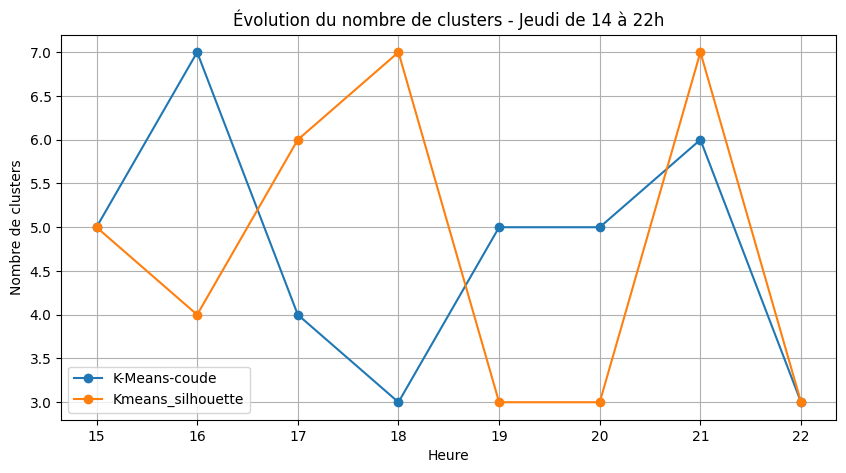

In [103]:
plt.figure(figsize=(10,5))
plt.plot(df_eval['heure'], df_eval['Coude_cluster'], marker='o', label='K-Means-coude')
plt.plot(df_eval['heure'], df_eval['Silhouette_cluster'], marker='o', label='Kmeans_silhouette')
plt.title(f"Évolution du nombre de clusters - Jeudi de 14 à 22h")
plt.xlabel("Heure")
plt.ylabel("Nombre de clusters")
plt.legend()
plt.grid(True)
plt.show()

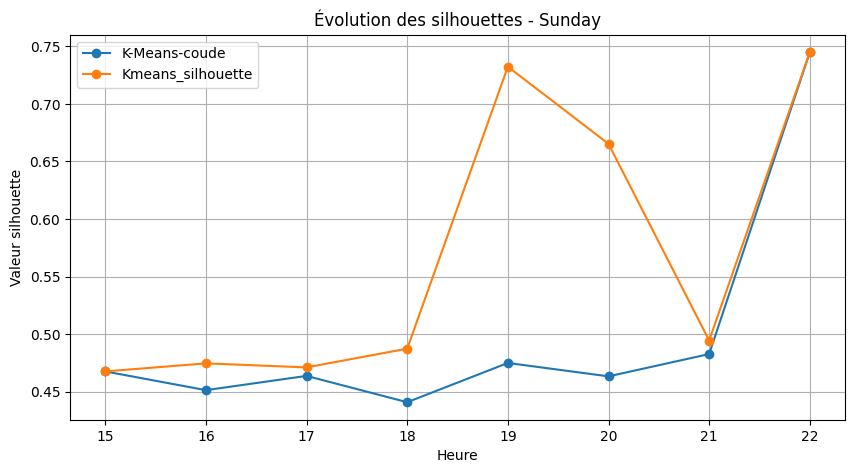

In [104]:
plt.figure(figsize=(10,5))
plt.plot(df_eval['heure'], df_eval['Coude_silhouette'], marker='o', label='K-Means-coude')
plt.plot(df_eval['heure'], df_eval['Meilleur_silhouette'], marker='o', label='Kmeans_silhouette')
plt.title(f"Évolution des silhouettes - {j}")
plt.xlabel("Heure")
plt.ylabel("Valeur silhouette")
plt.legend()
plt.grid(True)
plt.show()

En Kmeans version coude, le nombre de cluster reste assez stable, au moins au niveau de la partie silhouette.

Le score de silhouette version coude est en dessous du meilleur silhouette mais avec un score de 0.45 minimum, cela reste très bien